In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 

In [2]:
# generate dummy data 
X, y = make_circles(n_samples=300, noise=0.1, factor=0.7, random_state=0)

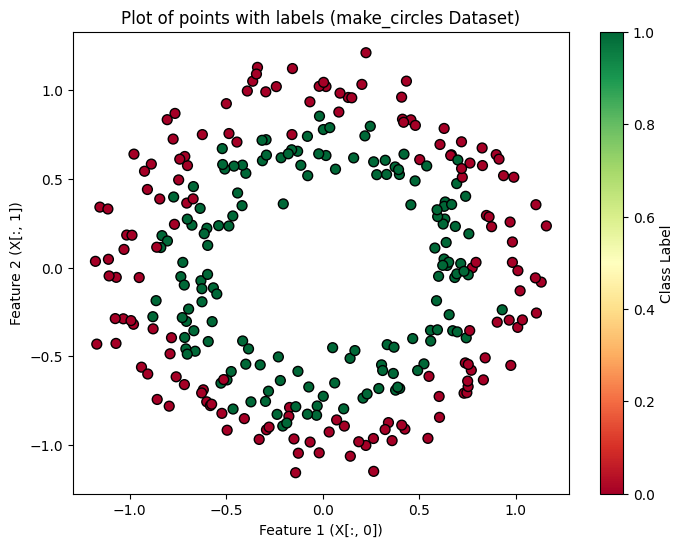

In [3]:
# plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.title("Plot of points with labels (make_circles Dataset)")
plt.colorbar(label="Class Label")
plt.show()


In [4]:
# model training
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

In [ ]:
def update_plot(hidden_layer_size):
    # create classifier with given hidden layer size 
    classifier = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                               activation='relu', max_iter=3000, random_state=1)
    
    # train classifier
    classifier.fit(X, y)

    # create a grid of points for plotting
    # These are 1D arrays for 100 values each, representing the x and y coordinates of the grid
    x_vals = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 100)
    y_vals = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 100)

    # the resulting x_plane and y_plan are both 100x100 arrays.
    # representing a grid of 10,000 points.
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    Z = classifier.predict(grid_points)

    Z = Z.reshape(X_plane.shape)

    y_pred = classifier.predict(X)

    # clear previous plots
    plt.clf()

    plt.contourf(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha=0.5)

    class_0 = y_pred == 0
    class_1 = y_pred == 1

    plt.scatter(X[class_0, 0], X[class_0, 1], c="red", edgecolors='k', marker='o', s=50, label="Predicted class 0")
    plt.scatter(X[class_1, 0], X[class_1, 1], c="green", edgecolors='k', marker='o', s=50, label="Predicted class 1")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Boundary and Predicted Labels (Hidden Layer Size={hidden_layer_size})")
    plt.legend()
    plt.show()

# create slider to change hidden layer size value 
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description="Hidden layer size")

interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Hidden layer size', max=10, min=1), Output()), _dom_clas…